<a href="https://colab.research.google.com/github/CIT-NLP/NLP-final-project/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown https://drive.google.com/uc?id=1wHRVN7l6quMFTG7seVS0pHh7ULrc78ug

Downloading...
From: https://drive.google.com/uc?id=1wHRVN7l6quMFTG7seVS0pHh7ULrc78ug
To: /content/processed_dataframe.csv
100% 180M/180M [00:01<00:00, 117MB/s]


In [11]:
import pandas as pd
from ast import literal_eval

df = pd.read_csv("./processed_dataframe.csv")

# interpret cols as lists instead of strings
for col in ['unigrams', 'sentences', 'lem_sent', 'genres']: 
  df[col] = df[col].apply(literal_eval)

df

,Unnamed: 0,summary,unigrams,sentences,lem_sent,genres
0,0,"Set in the second half of the 22nd century, th...","[set, second, half, 22nd, century, film, depic...","[Set in the second half of the 22nd century, t...","[[set, second, half, 22nd, century, film, depi...","[action, adventure, thriller, horror, science ..."
1,1,"Adam, a San Francisco-based artist who works a...","[adam, san, francisco, base, artist, work, cab...","[Adam, a San Francisco-based artist who works ...","[[adam, san, francisco, base, artist, work, ca...","[drama, comedy, romance]"
2,2,The story starts as one of the robots flies i...,"[story, start, robot, fly, scientist, secret, ...",[ The story starts as one of the robots flies ...,"[[story, start, robot, fly, scientist, secret,...","[action, adventure, family, short film, scienc..."
3,3,The film opens with Mary Poppins perched in a...,"[film, open, mary, poppins, perch, cloud, high...",[The film opens with Mary Poppins perched in ...,"[[film, open, mary, poppins, perch, cloud, hig...","[drama, comedy, family, fantasy]"
4,4,A young 20-year-old named Jody lives with his...,"[young, 20, year, old, name, jody, live, mothe...",[A young 20-year-old named Jody lives with hi...,"[[young, 20, year, old, name, jody, live, moth...","[drama, crime]"
...,...,...,...,...,...,...
16604,16604,Kalai Arasi' is a well-blended story of romanc...,"[kalai, arasi, blend, story, romance, science,...",[Kalai Arasi' is a well-blended story of roman...,"[[kalai, arasi, blend, story, romance, science...","[drama, action, romance, science fiction]"
16605,16605,Jennifer Haines is an up-and-coming Chicago a...,"[jennifer, haines, come, chicago, attorney, wi...",[Jennifer Haines is an up-and-coming Chicago ...,"[[jennifer, haines, come, chicago, attorney], ...","[crime, thriller]"
16606,16606,Kishan killed a man in his childhood when the...,"[kishan, kill, man, childhood, man, abuse, mot...",[Kishan killed a man in his childhood when th...,"[[kishan, kill, man, childhood, man, abuse, mo...","[drama, comedy, action, crime]"
16607,16607,{{plot}} The film opens with a Great Western e...,"[plot, film, open, great, western, express, sp...",[{{plot}} The film opens with a Great Western ...,"[[plot, film, open, great, western, express, s...","[comedy, crime, thriller]"


In [16]:
# idk where the col comes from 
df.drop('Unnamed: 0', axis=1, inplace = True)

## Sentence classification

In [18]:
def flatten_sent(sentences):
  return [" ".join(sent) for sent in sentences]

df["lem_sent_join"] = df.lem_sent.apply(flatten_sent)

df

,summary,unigrams,sentences,lem_sent,genres,lem_sent_join
0,"Set in the second half of the 22nd century, th...","[set, second, half, 22nd, century, film, depic...","[Set in the second half of the 22nd century, t...","[[set, second, half, 22nd, century, film, depi...","[action, adventure, thriller, horror, science ...",[set second half 22nd century film depict mars...
1,"Adam, a San Francisco-based artist who works a...","[adam, san, francisco, base, artist, work, cab...","[Adam, a San Francisco-based artist who works ...","[[adam, san, francisco, base, artist, work, ca...","[drama, comedy, romance]",[adam san francisco base artist work cab drive...
2,The story starts as one of the robots flies i...,"[story, start, robot, fly, scientist, secret, ...",[ The story starts as one of the robots flies ...,"[[story, start, robot, fly, scientist, secret,...","[action, adventure, family, short film, scienc...",[story start robot fly scientist secret lair u...
3,The film opens with Mary Poppins perched in a...,"[film, open, mary, poppins, perch, cloud, high...",[The film opens with Mary Poppins perched in ...,"[[film, open, mary, poppins, perch, cloud, hig...","[drama, comedy, family, fantasy]",[film open mary poppins perch cloud high londo...
4,A young 20-year-old named Jody lives with his...,"[young, 20, year, old, name, jody, live, mothe...",[A young 20-year-old named Jody lives with hi...,"[[young, 20, year, old, name, jody, live, moth...","[drama, crime]",[young 20 year old name jody live mother juani...
...,...,...,...,...,...,...
16604,Kalai Arasi' is a well-blended story of romanc...,"[kalai, arasi, blend, story, romance, science,...",[Kalai Arasi' is a well-blended story of roman...,"[[kalai, arasi, blend, story, romance, science...","[drama, action, romance, science fiction]",[kalai arasi blend story romance science ficti...
16605,Jennifer Haines is an up-and-coming Chicago a...,"[jennifer, haines, come, chicago, attorney, wi...",[Jennifer Haines is an up-and-coming Chicago ...,"[[jennifer, haines, come, chicago, attorney], ...","[crime, thriller]","[jennifer haines come chicago attorney, win bi..."
16606,Kishan killed a man in his childhood when the...,"[kishan, kill, man, childhood, man, abuse, mot...",[Kishan killed a man in his childhood when th...,"[[kishan, kill, man, childhood, man, abuse, mo...","[drama, comedy, action, crime]","[kishan kill man childhood man abuse mother, g..."
16607,{{plot}} The film opens with a Great Western e...,"[plot, film, open, great, western, express, sp...",[{{plot}} The film opens with a Great Western ...,"[[plot, film, open, great, western, express, s...","[comedy, crime, thriller]",[plot film open great western express speeding...


In [23]:
# make single list of sentences and genres for classification
sentences = []
sentence_genres = []

for _, row in df.iterrows(): 
  sentences.extend(row['lem_sent_join'])
  for sent in row['lem_sent_join']: 
    sentence_genres.append(row['genres'])

In [73]:
len(sentences) == len(sentence_genres)

True

In [32]:
len(sentences)

419443

In [29]:
# feature vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences)

X.shape

(419443, 90419)

In [58]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create MultiLabelBinarizer object
mlb = MultiLabelBinarizer()

# One-hot encode data
y = mlb.fit_transform(sentence_genres)

y.shape

(419443, 16)

In [37]:
# build and train naive bayes model 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
mnb = MultinomialNB()

multi_target_nb = MultiOutputClassifier(mnb, n_jobs=-1)
multi_target_nb.fit(X_train, y_train)

MultiOutputClassifier(estimator=MultinomialNB(), n_jobs=-1)

In [45]:
# predictions
preds = multi_target_nb.predict(X_test)

In [46]:
# metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score


acc = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds, average = 'weighted') 
jacc = jaccard_score(y_test, preds, average='weighted')

print(f"accuracy is {acc}")
print(f"f1 score is {f1}")
print(f"jaccard score is {jacc}")

accuracy is 0.1227455327873738
f1 score is 0.4594634193552901
jaccard score is 0.3212883245709924


In [48]:
# metrics 
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.39      0.55     22984
           1       0.94      0.21      0.35     12842
           2       0.85      0.40      0.54     29347
           3       0.93      0.18      0.31     16591
           4       0.20      0.00      0.00       519
           5       0.75      0.84      0.79     44833
           6       0.93      0.18      0.31     13092
           7       0.96      0.15      0.26      9078
           8       0.95      0.12      0.22     11506
           9       0.89      0.04      0.07      7539
          10       0.85      0.26      0.40     20936
          11       0.94      0.19      0.32      9251
          12       0.94      0.09      0.17      4266
          13       0.22      0.00      0.00      1494
          14       0.90      0.30      0.45     23917
          15       0.90      0.27      0.41     16414

   micro avg       0.83      0.36      0.50    244609
   macro avg       0.82   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


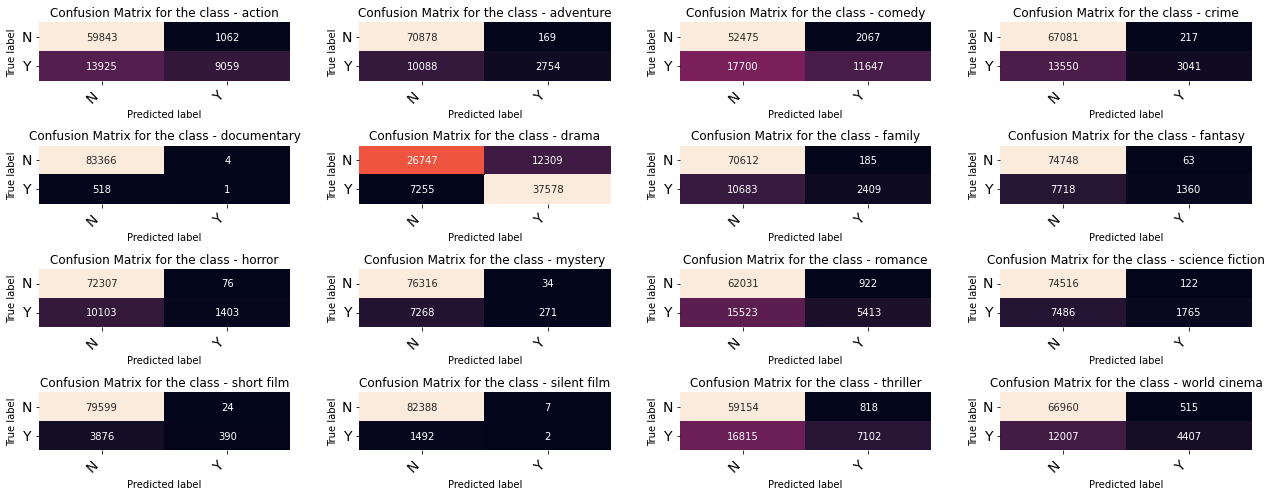

In [79]:
# confusion matrix
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

conf = multilabel_confusion_matrix(y_test, preds)

# turn one hot encoded vector back into original labels 

# make dummy array labeled with all genres
arr = np.ones((1, y.shape[1]), dtype = int)

# get genres, is 2d array so get first element 
cm_labels = mlb.inverse_transform(arr)[0]



def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names,)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

fig, ax = plt.subplots(4, 4, figsize=(18, 7))
    
for axes, cfs_matrix, label in zip(ax.flatten(), conf, cm_labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
plt.show()

## Full Summary Classification


In [116]:
y_doc = df.genres.values

print(y_doc.shape)

y_doc

(16609,)


array([list(['action', 'adventure', 'thriller', 'horror', 'science fiction']),
       list(['drama', 'comedy', 'romance']),
       list(['action', 'adventure', 'family', 'short film', 'science fiction', 'fantasy']),
       ..., list(['drama', 'comedy', 'action', 'crime']),
       list(['comedy', 'crime', 'thriller']),
       list(['drama', 'adventure', 'short film', 'science fiction'])],
      dtype=object)

In [117]:
lst = []

for _, row in df.iterrows():
  strng = " ".join(row['unigrams'])
  lst.append(strng)

lst[0]

'set second half 22nd century film depict mars planet 84 terraforme allow human walk surface wear pressure suit martian society largely matriarchal woman position authority story concern police officer melanie ballard second command small team alongside sergeant jericho send pick transport prisoner name desolation williams arrive remote mining town williams hold ballard find virtually people miss learn miner discover underground doorway create ancient martian civilization door open release ghost disembodied spirit possess miner violence ensue possess miner commit horrific act death destruction self mutilation team leader helena bradock murder ballard fight attack miner escape town destroy ghost possible unfortunately intention complicate fact kill possess human merely release martian spirit possess human team eventually decide blow nuclear reactor try vaporize ghost point film sergeant jericho show romantic interest ballard unreciprocated ballard crew survivor manage gather jail eventu

In [118]:
len(lst)

16609

In [119]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create MultiLabelBinarizer object
mlb = MultiLabelBinarizer()

# One-hot encode data
y1 = mlb.fit_transform(y_doc)

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(lst, y1, test_size=0.2, random_state=123)

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [125]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

multi_target_nb = MultiOutputClassifier(mnb, n_jobs=-1)
multi_target_nb.fit(X_train, y_train)

MultiOutputClassifier(estimator=MultinomialNB(), n_jobs=-1)

In [126]:
preds = multi_target_nb.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

acc = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds, average = 'weighted') 
jacc = jaccard_score(y_test, preds, average='weighted')


print(f"accuracy is {acc}")
print(f"f1 score is {f1}")
print(f"jaccard score is {jacc}")

accuracy is 0.0009030704394942806
f1 score is 0.17711355978308604
jaccard score is 0.13895473146717494


In [128]:
from sklearn.metrics import classification_report

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       839
           1       0.00      0.00      0.00       451
           2       0.89      0.09      0.16      1241
           3       0.00      0.00      0.00       650
           4       0.00      0.00      0.00        34
           5       0.69      0.92      0.79      1822
           6       1.00      0.02      0.04       472
           7       0.00      0.00      0.00       280
           8       0.00      0.00      0.00       368
           9       0.00      0.00      0.00       272
          10       0.00      0.00      0.00       818
          11       0.00      0.00      0.00       312
          12       0.00      0.00      0.00       244
          13       0.00      0.00      0.00        65
          14       1.00      0.00      0.00       852
          15       0.00      0.00      0.00       640

   micro avg       0.70      0.19      0.30      9360
   macro avg       0.29   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
